# 로이터 뉴스 분류하기
- https://wikidocs.net/22933


In [1]:
cd /content/drive/MyDrive/edu

/content/drive/MyDrive/edu


In [6]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

- 데이터셋 분리 (학습, 평가)

In [3]:
num_words = 1000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))

num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


- x 데이터 패딩

In [7]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [8]:
X_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]], dtype=int32)

In [13]:
X_train.shape

(8982, 100)

- y 데이터 원핫 인코딩

In [9]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

- 모델링

In [14]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

- earlystopping, checkpoint

In [15]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

- 모델 컴파일

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

- 트레이닝

In [17]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - 9s 22ms/step - loss: 2.9662 - acc: 0.3141 - val_loss: 2.4154 - val_acc: 0.3620

Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
Epoch 2/30
71/71 [==============================] - 1s 14ms/step - loss: 2.4082 - acc: 0.3538 - val_loss: 2.0322 - val_acc: 0.4951

Epoch 00002: val_acc improved from 0.36198 to 0.49510, saving model to best_model.h5
Epoch 3/30
71/71 [==============================] - 1s 14ms/step - loss: 1.9926 - acc: 0.4871 - val_loss: 1.8505 - val_acc: 0.5307

Epoch 00003: val_acc improved from 0.49510 to 0.53072, saving model to best_model.h5
Epoch 4/30
71/71 [==============================] - 1s 14ms/step - loss: 1.8182 - acc: 0.5283 - val_loss: 1.7661 - val_acc: 0.5405

Epoch 00004: val_acc improved from 0.53072 to 0.54052, saving model to best_model.h5
Epoch 5/30
71/71 [==============================] - 1s 14ms/step - loss: 1.7137 - acc: 0.5523 - val_loss: 1.6885 - val_acc: 0.5712

Epo

- loss 시각화

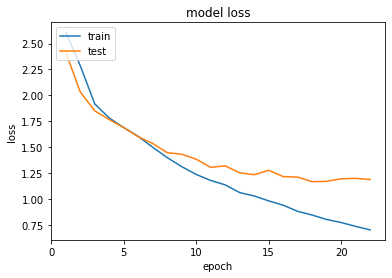

In [18]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()